You are given a binary tree in which each node contains an integer value.

Find the number of paths that sum to a given value.

The path does not need to start or end at the root or a leaf, but it must go downwards (traveling only from parent nodes to child nodes).

The tree has no more than 1,000 nodes and the values are in the range -1,000,000 to 1,000,000.

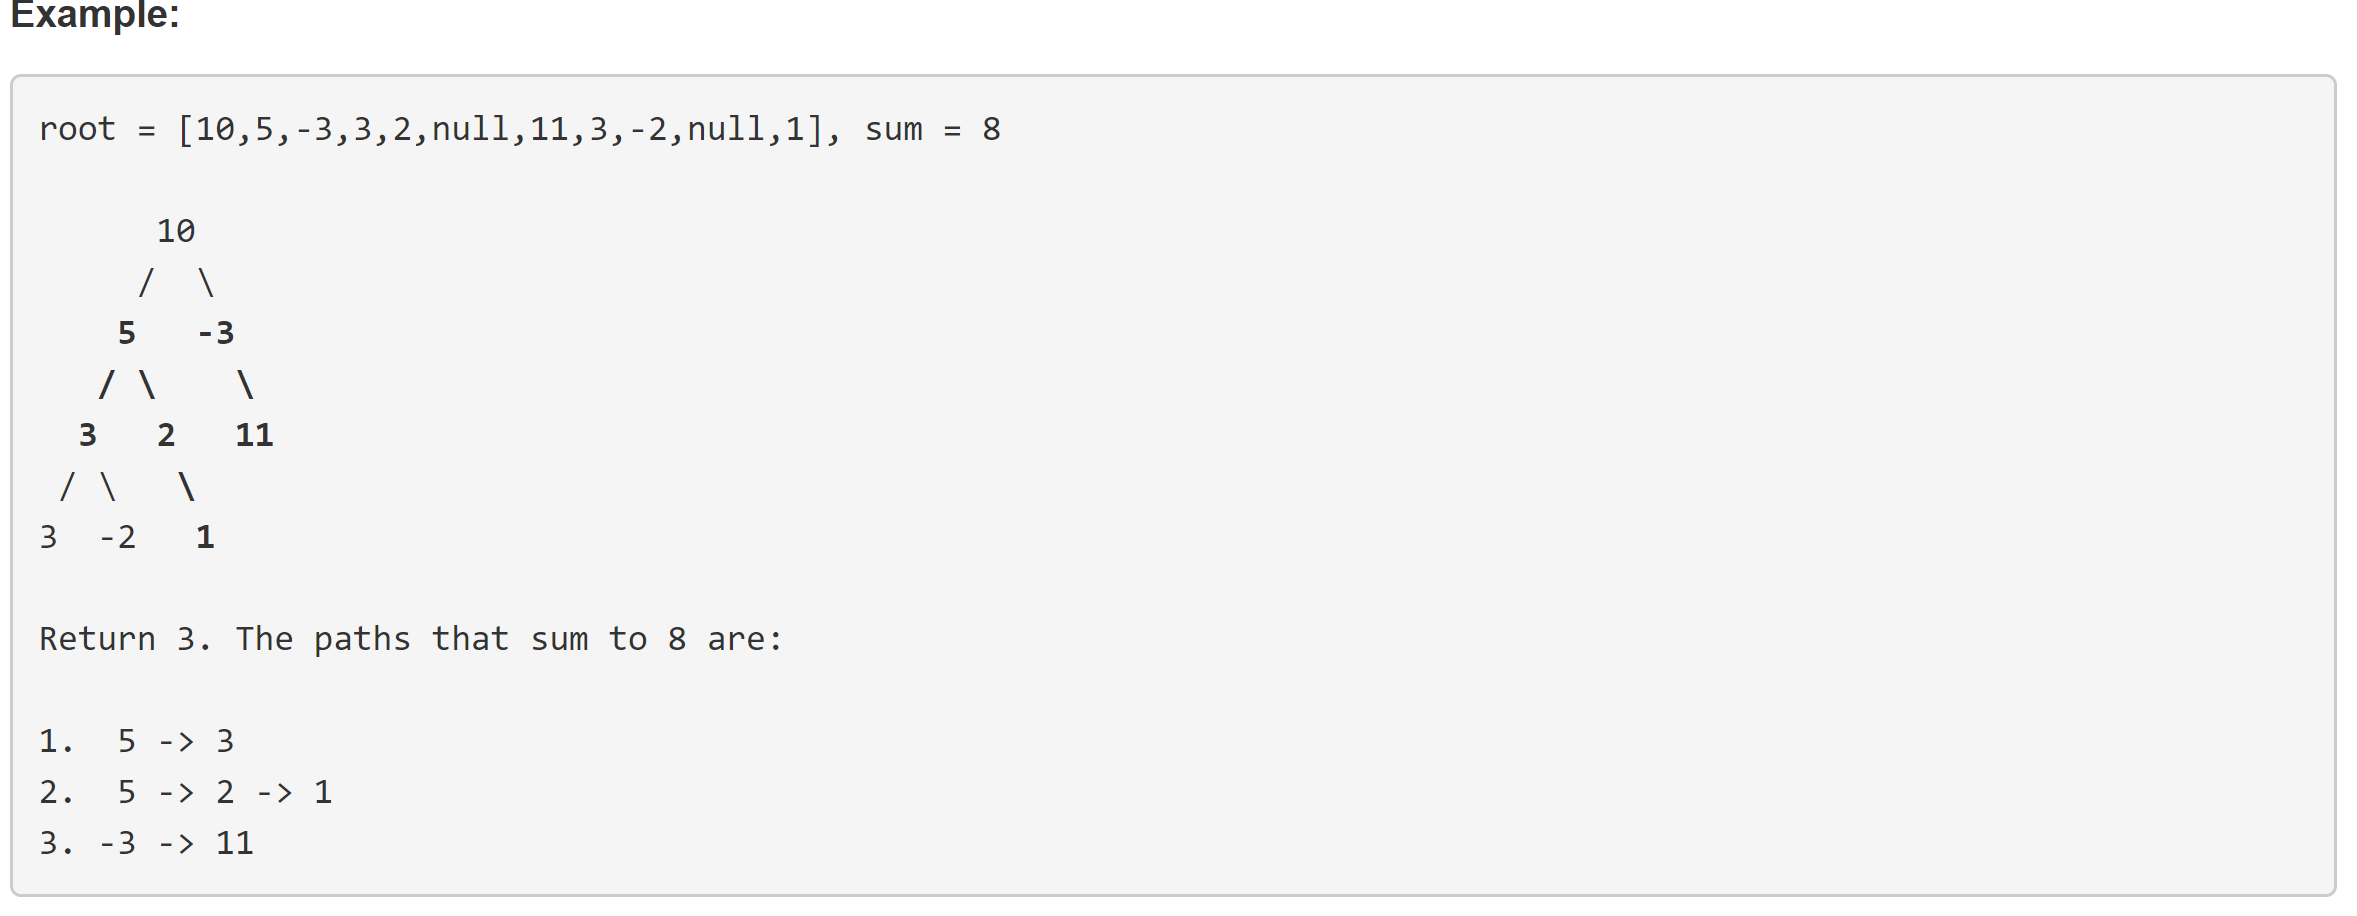

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def pathSum(self, root, target):
        """
        :type root: TreeNode
        :type sum: int
        :rtype: int
        """
        preSum={0:1} # store in dictionary for complementary
        curSum=0 #current sum
        stack=[]
        res=0
        
        while True:
            while root:
                curSum+=root.val
                complementary = curSum - target
                res += preSum.get(complementary,0)
                preSum[curSum] = preSum.get(curSum, 0) + 1
                stack.append((root,False))
                root=root.left
                
            #-------------------------------------    
            if not stack: #this means every node has visited once -> break 
                break
            node , visited = stack.pop()
            #-------------------------------------
            
            if visited:
                preSum[curSum] -= 1
                curSum -= node.val
            else:
                stack.append((node,True)) # visited once
                root=node.right                
        return res

In [ ]:
#Time complexity: O(n)
#Space complexity: O(n)
class Solution(object):
    def helper(self, root, target, so_far, cache):
        if root:
            complement = so_far + root.val - target
            if complement in cache:
                self.result += cache[complement]
            cache.setdefault(so_far+root.val, 0)
            cache[so_far+root.val] += 1
            self.helper(root.left, target, so_far+root.val, cache)
            self.helper(root.right, target, so_far+root.val, cache)
            cache[so_far+root.val] -= 1
        return

    def pathSum(self, root, sum):
        """
        :type root: TreeNode
        :type sum: int
        :rtype: int
        """
        self.result = 0
        self.helper(root, sum, 0, {0:1})
        return self.result

In [ ]:
#Time complexity: O(n^2)
#Space complexity: O(1)
class SolutionBruteForce(object):
    def find_paths(self, root, target):
        if root:
            return int(root.val == target) + self.find_paths(root.left, target-root.val) + self.find_paths(root.right, target-root.val)
        return 0

    def pathSum(self, root, sum):
        """
        :type root: TreeNode
        :type sum: int
        :rtype: int
        """
        if root:
            return self.find_paths(root, sum) + self.pathSum(root.left, sum) + self.pathSum(root.right, sum)
        return 0

### Solution


https://leetcode.com/problems/path-sum-iii/discuss/91892/Python-solution-with-detailed-explanation

iterative:

https://leetcode.com/problems/path-sum-iii/discuss/126620/python-iterate-O(n)-for-1000-higher-tree